<a href="https://colab.research.google.com/github/tidaltamu/workshops/blob/main/special_topics/workshop3/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

### Read Data

In [ ]:
#genfromtxt - 
data = np.genfromtxt('https://raw.githubusercontent.com/kaustubholpadkar/Linear_Regression-Gradient_Descent-Octave/master/data.csv', delimiter=',')
data

array([[ 32.50234527,  31.70700585],
       [ 53.42680403,  68.77759598],
       [ 61.53035803,  62.5623823 ],
       [ 47.47563963,  71.54663223],
       [ 59.81320787,  87.23092513],
       [ 55.14218841,  78.21151827],
       [ 52.21179669,  79.64197305],
       [ 39.29956669,  59.17148932],
       [ 48.10504169,  75.3312423 ],
       [ 52.55001444,  71.30087989],
       [ 45.41973014,  55.16567715],
       [ 54.35163488,  82.47884676],
       [ 44.1640495 ,  62.00892325],
       [ 58.16847072,  75.39287043],
       [ 56.72720806,  81.43619216],
       [ 48.95588857,  60.72360244],
       [ 44.68719623,  82.89250373],
       [ 60.29732685,  97.37989686],
       [ 45.61864377,  48.84715332],
       [ 38.81681754,  56.87721319],
       [ 66.18981661,  83.87856466],
       [ 65.41605175, 118.5912173 ],
       [ 47.48120861,  57.25181946],
       [ 41.57564262,  51.39174408],
       [ 51.84518691,  75.38065167],
       [ 59.37082201,  74.76556403],
       [ 57.31000344,  95.45505292],
 

In [ ]:
data.shape

(100, 2)

### Seperate Data into X and Y

In [ ]:
X = data[:, 0]
Y = data[:, 1]

### Visualize the Data

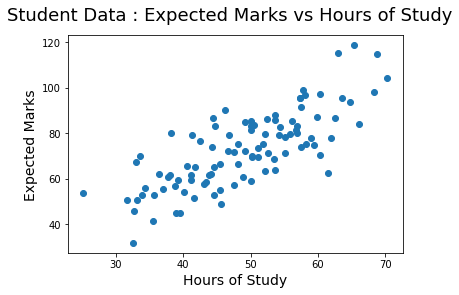

In [ ]:
fig = plt.figure()
plt.scatter(X, Y)
fig.suptitle('Student Data : Expected Marks vs Hours of Study', fontsize=18)
plt.xlabel('Hours of Study', fontsize=14)
plt.ylabel('Expected Marks', fontsize=14)
plt.show()

### Hyperparameters

In [ ]:
learning_rate = 0.0001
max_iteration = 50

### Parameters

In [ ]:
m = 0
b = 0

### Hypothesis

In [ ]:
def h (m, b, X) :
  return m * X + b

### Loss Function


A loss function is a way to map the performance of our model into a real number. It measures how well the model is performing its task like a linear regression model fitting the data to a line. The loss function is particularly important in learning since it is what guides the update of the parameters so that the model can perform better.

An example of loss is mean sqaured error. It measures the average squared distance between two sets of values. A large MSE indicates data points being widely spread, while a small MSE indicates the opposite.

A good intuition for the squared loss is that it will drive the model towards the mean of the training set, therefore it is sensitive to outliers. Our goal is to obviously minimize the Loss so the regression line predicts more accurately.

In [ ]:
def loss (m, b, X, Y) :
  return np.average(np.square(Y - h(m, b, X))) / 2

### Calculate Gradients

In [ ]:
def gradient (m, b, X, Y) :
  dm = - np.average((Y - h(m, b, X)) * X)
  db = - np.average(Y - h(m, b, X))
  return (dm, db)

### Gradient Descent

In [ ]:
def gradient_descent (m, b, X, Y, learning_rate, max_iteration) :
  for i in range(max_iteration) :
    dm, db = gradient (m, b, X, Y)
    m -= learning_rate * dm
    b -= learning_rate * db
    if i % 10 == 0 :
      print ('iteration : ', i, ' loss : ', loss(m, b, X, Y)) 
  return (m, b)

### Train Model

In [ ]:
m, b = gradient_descent (m, b, X, Y, learning_rate, max_iteration)

iteration :  0  loss :  1593.1334591670338
iteration :  10  loss :  61.30482288585254
iteration :  20  loss :  56.34127863702311
iteration :  30  loss :  56.32510567688097
iteration :  40  loss :  56.324963270541446


### Optimal values of Parameters using Trained Model

In [ ]:
m, b

(1.4788903781318357, 0.030569950649287976)

### Linear Regression using *polyfit*  function of **numpy**

In [ ]:
np_m, np_b = np.polyfit(X, Y, 1)

### Optimal values of Parameters using Numpy Linear Regression

In [ ]:
np_m, np_b

(1.32243102275536, 7.991020982270385)

### Visualize the Data

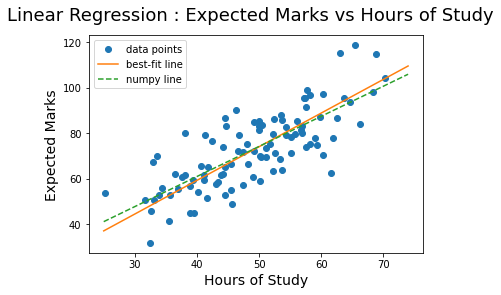

In [ ]:
fig = plt.figure()

# Generate data for plotting Line
x = np.arange(25, 75)
y = [m * x_i + b for x_i in x]

# Generate data for plotting Line Numpy Linear Regression
np_x = np.arange(25, 75)
np_y = [np_m * x_i + np_b for x_i in np_x]

# plot data and best-fit lines
plt.plot(X, Y, 'o', x, y, '-', np_x, np_y, '--')
plt.legend(loc='upper left', labels=['data points', 'best-fit line', 'numpy line'])

fig.suptitle('Linear Regression : Expected Marks vs Hours of Study', fontsize=18)
plt.xlabel('Hours of Study', fontsize=14)
plt.ylabel('Expected Marks', fontsize=14)
plt.show()

# Multivariate Linear Regression
## Predicting House Price from Size and Number of Bedrooms

$$y = \theta_0 + \theta_1x_1 + \theta_2x_2$$
$$y = 5.9s + 2.4b$$

### Import Libraries

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

### Read Data

In [ ]:
data = np.genfromtxt('https://raw.githubusercontent.com/Tan-Moy/medium_articles/master/art2_multivariate_linear_regression/home.txt', delimiter=',')
data

array([[2.10400e+03, 3.00000e+00, 3.99900e+05],
       [1.60000e+03, 3.00000e+00, 3.29900e+05],
       [2.40000e+03, 3.00000e+00, 3.69000e+05],
       [1.41600e+03, 2.00000e+00, 2.32000e+05],
       [3.00000e+03, 4.00000e+00, 5.39900e+05],
       [1.98500e+03, 4.00000e+00, 2.99900e+05],
       [1.53400e+03, 3.00000e+00, 3.14900e+05],
       [1.42700e+03, 3.00000e+00, 1.98999e+05],
       [1.38000e+03, 3.00000e+00, 2.12000e+05],
       [1.49400e+03, 3.00000e+00, 2.42500e+05],
       [1.94000e+03, 4.00000e+00, 2.39999e+05],
       [2.00000e+03, 3.00000e+00, 3.47000e+05],
       [1.89000e+03, 3.00000e+00, 3.29999e+05],
       [4.47800e+03, 5.00000e+00, 6.99900e+05],
       [1.26800e+03, 3.00000e+00, 2.59900e+05],
       [2.30000e+03, 4.00000e+00, 4.49900e+05],
       [1.32000e+03, 2.00000e+00, 2.99900e+05],
       [1.23600e+03, 3.00000e+00, 1.99900e+05],
       [2.60900e+03, 4.00000e+00, 4.99998e+05],
       [3.03100e+03, 4.00000e+00, 5.99000e+05],
       [1.76700e+03, 3.00000e+00, 2.5290

In [ ]:
data.shape

(47, 3)

### Visualize Data

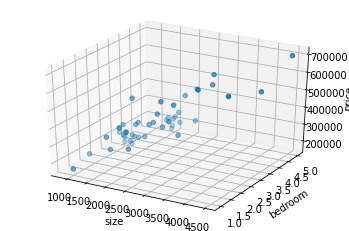

In [ ]:
X = data[:, 0:2]
Y = data[:, 2:]

# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('size')
ax.set_ylabel('bedroom')
ax.set_zlabel('price')

plt.show()

### Normalize Data

In [ ]:
data = normalize(data, axis=0)
data

array([[0.14276982, 0.13429844, 0.16105104],
       [0.10857021, 0.13429844, 0.13286006],
       [0.16285531, 0.13429844, 0.14860674],
       [0.09608463, 0.0895323 , 0.09343296],
       [0.20356914, 0.17906459, 0.217433  ],
       [0.13469491, 0.17906459, 0.12077821],
       [0.10409169, 0.13429844, 0.12681914],
       [0.09683105, 0.13429844, 0.08014253],
       [0.0936418 , 0.13429844, 0.0853784 ],
       [0.10137743, 0.13429844, 0.09766161],
       [0.13164137, 0.17906459, 0.09665439],
       [0.13571276, 0.13429844, 0.13974671],
       [0.12824856, 0.13429844, 0.13289993],
       [0.30386086, 0.22383074, 0.28186953],
       [0.08604189, 0.13429844, 0.10466908],
       [0.15606967, 0.17906459, 0.18118746],
       [0.08957042, 0.0895323 , 0.12077821],
       [0.08387048, 0.13429844, 0.08050538],
       [0.17703729, 0.17906459, 0.20136334],
       [0.20567268, 0.17906459, 0.24123424],
       [0.11990222, 0.13429844, 0.10184998],
       [0.12811284, 0.0895323 , 0.10269571],
       [0.

### Seperate Data into X and Y

In [ ]:
X = data[:, 0:2]
Y = data[:, 2:]

### Visualize the Data

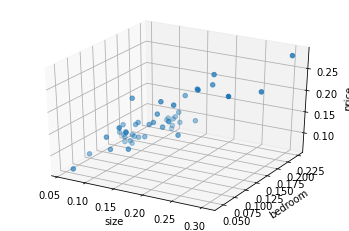

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('size')
ax.set_ylabel('bedroom')
ax.set_zlabel('price')

plt.show()

In [ ]:
def h (theta, X) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  return np.matmul(tempX, theta)

### Loss Function

Define Loss Function as $ J(\theta_0,...,\theta_n) $

A loss function is a way to map the performance of our model into a real number. It measures how well the model is performing its task like a linear regression model fitting the data to a line. The loss function is particularly important in learning since it is what guides the update of the parameters so that the model can perform better.

An example of loss is mean sqaured error. It measures the average squared distance between two sets of values. A large MSE indicates data points being widely spread, while a small MSE indicates the opposite.

A good intuition for the squared loss is that it will drive the model towards the mean of the training set, therefore it is sensitive to outliers. Our goal is to obviously minimize the Loss so the regression line predicts more accurately.

In [ ]:
def loss (theta, X, Y) :
  return np.average(np.square(Y - h(theta, X))) / 2

### Calculate Gradients

https://sandipanweb.files.wordpress.com/2017/11/sgd.gif?w=479

In [ ]:
def gradient (theta, X, Y) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  d_theta = - np.average((Y - h(theta, X)) * tempX, axis= 0)
  d_theta = d_theta.reshape((d_theta.shape[0], 1))
  return d_theta

### Batch Gradient Descent


Repeat:

$\theta_{i+1} = \theta_i - \alpha \frac{\partial}{\partial\theta_j}J(\theta)$

In [ ]:
def gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    d_theta = gradient (theta, X, Y)
    theta = theta - learning_rate * d_theta
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

### Reset Theta

In [ ]:
theta = np.zeros((data.shape[1], 1))
theta

array([[0.],
       [0.],
       [0.]])

### Hyperparameters

In [ ]:
learning_rate = 1
max_iteration = 5000

### Train Model

In [ ]:
theta = np.zeros((data.shape[1], 1))

theta, cost = gradient_descent (theta, X, Y, learning_rate, max_iteration, 1000)

iteration :  0  loss :  0.0011960196437456382
iteration :  1000  loss :  0.0003479714095097213
iteration :  2000  loss :  0.0003354292812760603
iteration :  3000  loss :  0.00033246115718214576
iteration :  4000  loss :  0.0003316794692904493


### Optimal Values of Parameters Using Trained Model

In [ ]:
theta

array([[ 0.03500812],
       [ 0.82002865],
       [-0.06511682]])

In [ ]:
loss(theta, X, Y)

0.00033147355792877473

### Cost vs. Iteration Plots

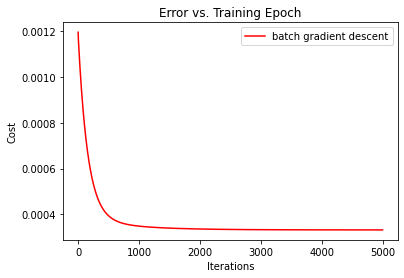

In [ ]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(max_iteration), cost, 'r')  
ax.legend(loc='upper right', labels=['batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

plt.show()


https://colab.research.google.com/github/kaustubholpadkar/Linear_Regression-Gradient_Descent-Octave/blob/master/Linear_Regression_Python.ipynb